***
**'cool title for proj1'**
***

**'part1'** EDA

In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import folium

In [2]:
# add some geo visiulisation to the project
m = folium.Map(
    location= [47.6210, -122.257],
    tiles= 'Stamen Toner',
    zoom_start = 11
)

In [3]:
folium.CircleMarker(
    location=[47.6210, -122.257],
    radius=250,
    color='#8fbde4',
    fill=True,
    fill_color='#8fbde4'
).add_to(m)

In [4]:
m

In [98]:
# open files
data = pd.read_csv('/Users/flatironschool/CourseMater/PROJ1/kc_house_data.csv')
zip_codes = pd.read_csv('/Users/flatironschool/CourseMater/PROJ1/zip_codes_all.csv')

In [100]:
# quick look at data set
print(data.info(), '\n'
     )
print(data.head()
     )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
None 

     

In [101]:
# basic stats for data set
print(data.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825    

**'part1a'** cleaning

In [102]:
# checking for duplicates
data[data.duplicated(subset='id', keep=False)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 93 to 21565
Data columns (total 21 columns):
id               353 non-null int64
date             353 non-null object
price            353 non-null float64
bedrooms         353 non-null int64
bathrooms        353 non-null float64
sqft_living      353 non-null int64
sqft_lot         353 non-null int64
floors           353 non-null float64
waterfront       307 non-null float64
view             353 non-null float64
condition        353 non-null int64
grade            353 non-null int64
sqft_above       353 non-null int64
sqft_basement    353 non-null object
yr_built         353 non-null int64
yr_renovated     286 non-null float64
zipcode          353 non-null int64
lat              353 non-null float64
long             353 non-null float64
sqft_living15    353 non-null int64
sqft_lot15       353 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 60.7+ KB


As we can see this DataSet contains **353** duplicated entries. I decided to keep them all because the only feature they are same is **ID**. That means that a house could have sold twice or more times and that could have impact on our target variable.

In [103]:
# checking for missing values
data.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [106]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [107]:
# check for frequencies of values
for col in data.columns:
    print(col, '\n', data[col].value_counts(normalize=True).head(10), '\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
3969300030    0.000093
2560801222    0.000093
3883800011    0.000093
2228900270    0.000093
251300110     0.000093
Name: id, dtype: float64 

date 
 6/23/2014    0.006575
6/26/2014    0.006066
6/25/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
3/25/2015    0.005695
7/9/2014     0.005603
4/28/2015    0.005603
4/14/2015    0.005603
4/22/2015    0.005603
Name: date, dtype: float64 

price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
325000.0    0.006853
400000.0    0.006714
375000.0    0.006390
300000.0    0.006158
525000.0    0.006066
Name: price, dtype: float64 

bedrooms 
 3     0.454878
4     0.318655
2     0.127796
5     0.074131
6     0.012594
1     0.009075
7     0.001760
8     0.000602
9     0.000278
10    0.000139
Name: bedrooms, dtype: float64 

bathrooms 
 2.50    0.248970
1.00    0.1

I would like to take a closer look at some columns

In [108]:
data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [109]:
data['yr_renovated'].value_counts().head()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

Such columns as 'waterfront', 'yr_renovated' not only have some missing values (more than 10% of all amount of entries) but also contain 0.0 as values. That means they cannot have an impact on target variable

We also can drop following columns: 'id', 'date', 'view', 'lat', 'long'. They just describe some not importnat features of this data set

In [110]:
# drop required columns and replace dataframe
data.drop(
    columns= ['id','date', 'waterfront', 'view', 'yr_renovated', 'lat', 'long'],
    axis= 1,
    inplace = True
)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
zipcode          21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(3), int64(10), object(1)
memory usage: 2.3+ MB


We can notice that some max_values of 'price' and 'sqft_living' are much more then theirs 75-percentile. We can expect that some values are outliers and beyound our range. We assume that the range for values defined by:

## **OUTLIERS** [Q1 - 1.5IQR; Q3 + 1.5IQR] where IQR = Q3 - Q1

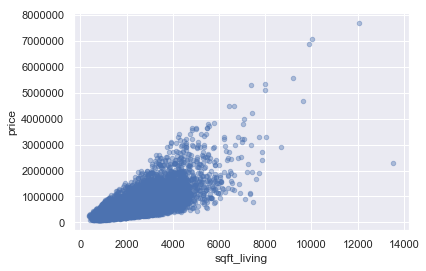

In [112]:
data.plot(kind='scatter', x= 'sqft_living', y='price', alpha=0.4, color='b');
plt.savefig('image_1.png')

In [18]:
data.sort_values(by='price', ascending= False).head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
7245,7700000.0,6,8.00,12050,27600,2.5,4,13,8570,3480.0,1910,98102,3940,8800
3910,7060000.0,5,4.50,10040,37325,2.0,3,11,7680,2360.0,1940,98004,3930,25449
9245,6890000.0,6,7.75,9890,31374,2.0,3,13,8860,1030.0,2001,98039,4540,42730
4407,5570000.0,5,5.75,9200,35069,2.0,3,13,6200,3000.0,2001,98039,3560,24345
1446,5350000.0,5,5.00,8000,23985,2.0,3,12,6720,1280.0,2009,98004,4600,21750
1313,5300000.0,6,6.00,7390,24829,2.0,4,12,5000,2390.0,1991,98040,4320,24619
1162,5110000.0,5,5.25,8010,45517,2.0,3,12,5990,2020.0,1999,98033,3430,26788
8085,4670000.0,5,6.75,9640,13068,1.0,3,12,4820,4820.0,1983,98040,3270,10454
2624,4500000.0,5,5.50,6640,40014,2.0,3,12,6350,290.0,2004,98155,3030,23408
8629,4490000.0,4,3.00,6430,27517,2.0,3,12,6430,0.0,2001,98004,3720,14592


In [113]:
# find IQR
IQR_price= data['price'].quantile(.75) - data['price'].quantile(.25)
# compute boundaries
low_boundary_price= data['price'].quantile(.25) - 1.5*IQR_price
high_boundary_price= data['price'].quantile(.75) + 1.5*IQR_price
print('Expected range for price in our data set: [{0} ; {1}]'.format(low_boundary_price, high_boundary_price))

Expected range for price in our data set: [-162500.0 ; 1129500.0]


In [114]:
data = data[data['price'] < high_boundary_price]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20439 entries, 0 to 21596
Data columns (total 14 columns):
price            20439 non-null float64
bedrooms         20439 non-null int64
bathrooms        20439 non-null float64
sqft_living      20439 non-null int64
sqft_lot         20439 non-null int64
floors           20439 non-null float64
condition        20439 non-null int64
grade            20439 non-null int64
sqft_above       20439 non-null int64
sqft_basement    20439 non-null object
yr_built         20439 non-null int64
zipcode          20439 non-null int64
sqft_living15    20439 non-null int64
sqft_lot15       20439 non-null int64
dtypes: float64(3), int64(10), object(1)
memory usage: 2.3+ MB


In [115]:
data.sort_values(by='sqft_living', ascending= False).head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
4020,800000.0,7,6.75,7480,41664,2.0,3,11,5080,2400.0,1953,98166,2810,33190
2711,1110000.0,5,3.50,7350,12231,2.0,3,11,4750,2600.0,2001,98065,5380,12587
21034,900000.0,5,6.00,7120,40806,2.0,3,12,5480,1640.0,2007,98006,3440,36859
577,930000.0,4,4.00,6050,84942,2.5,3,9,4150,1900.0,2009,98077,2700,199504
18399,784500.0,4,5.00,5820,13906,2.0,3,11,3750,2070.0,1993,98042,2980,13000
1919,740000.0,5,5.00,5774,31675,1.0,3,11,4490,1284.0,1984,98003,3260,13200
1805,930000.0,4,4.25,5710,24663,2.0,3,11,5710,0.0,2007,98092,4060,23847
1054,935000.0,4,4.50,5670,84267,2.0,3,11,5670,0.0,2008,98010,4100,83729
8188,955000.0,4,4.25,5660,193593,2.0,3,10,4100,1560.0,2001,98019,3620,207141
20280,950000.0,4,4.00,5635,9695,2.0,3,10,4360,1275.0,2011,98003,3726,9765


In [116]:
# find IQR
IQR_sqft= data['sqft_living'].quantile(.75) - data['sqft_living'].quantile(.25)
# compute boundaries
low_boundary_sqft= data['sqft_living'].quantile(.25) - 1.5*IQR_sqft
high_boundary_sqft= data['sqft_living'].quantile(.75) + 1.5*IQR_sqft
print('Expected range for sqft_living in our data set: [{0} ; {1}]'.format(low_boundary_sqft, high_boundary_sqft))

Expected range for sqft_living in our data set: [-145.0 ; 3975.0]


In [117]:
data = data[data['sqft_living'] < high_boundary_sqft]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20120 entries, 0 to 21596
Data columns (total 14 columns):
price            20120 non-null float64
bedrooms         20120 non-null int64
bathrooms        20120 non-null float64
sqft_living      20120 non-null int64
sqft_lot         20120 non-null int64
floors           20120 non-null float64
condition        20120 non-null int64
grade            20120 non-null int64
sqft_above       20120 non-null int64
sqft_basement    20120 non-null object
yr_built         20120 non-null int64
zipcode          20120 non-null int64
sqft_living15    20120 non-null int64
sqft_lot15       20120 non-null int64
dtypes: float64(3), int64(10), object(1)
memory usage: 2.3+ MB


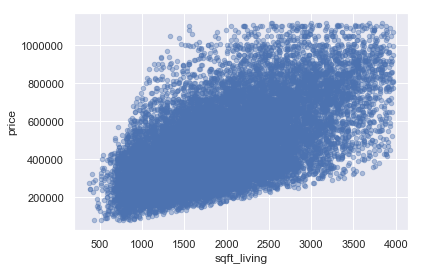

In [118]:
data.plot(kind='scatter', x= 'sqft_living', y='price', alpha=0.4, color='b')
plt.savefig('image_2.png')

As we can see now our data set looks more homogeneous

***
**'part1b'** CATEGORICAL

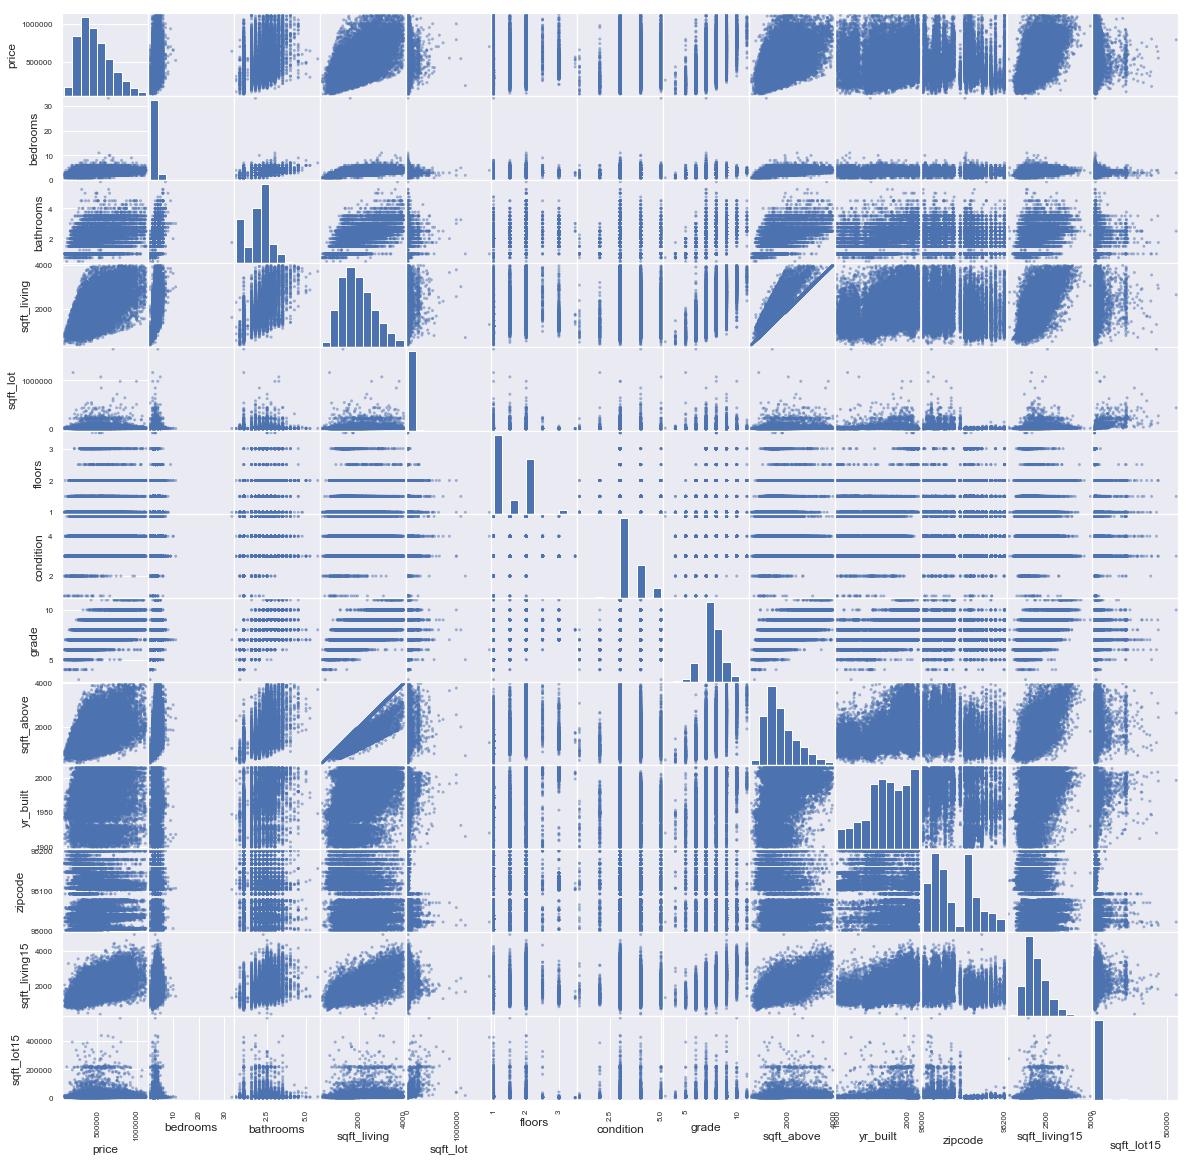

In [119]:
# Take a general look at how data are distribured around each faeture
pd.plotting.scatter_matrix(data,figsize  = [20, 20]);

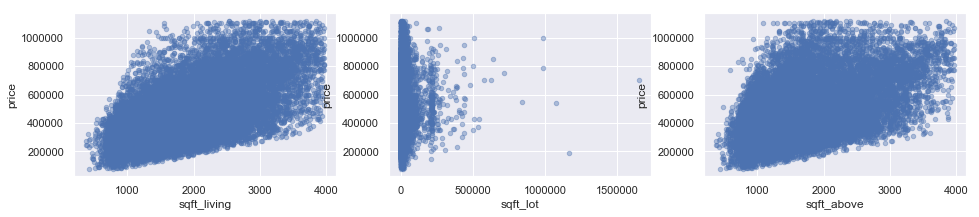

In [120]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'sqft_lot', 'sqft_above'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [121]:
# identifying categorical variables
print(data['zipcode'].describe())

count    20120.000000
mean     98078.880964
std         53.460235
min      98001.000000
25%      98033.000000
50%      98070.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64


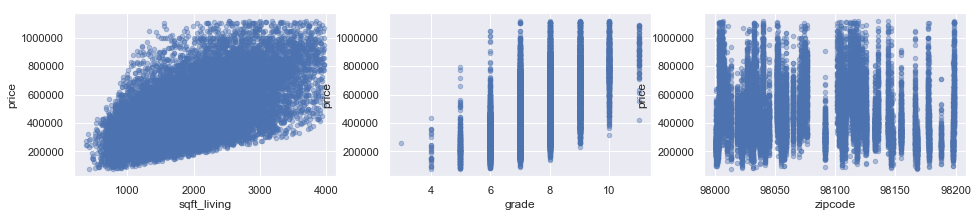

In [122]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'grade', 'zipcode'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
plt.savefig('image_3.png')

***
**'part2'** MODELING
***

**'part2a'** linear regression

In [20]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,98074,1800,7503


In [37]:
data.corr()['price'].sort_values(ascending= False)

price            1.000000
grade            0.610743
sqft_living      0.600175
sqft_living15    0.537544
sqft_above       0.497121
bathrooms        0.428582
bedrooms         0.275486
floors           0.260107
sqft_lot         0.071975
sqft_lot15       0.060739
condition        0.049173
yr_built         0.040285
zipcode         -0.008334
Name: price, dtype: float64

In [38]:
# find correlations
round(data.corr(), 2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15
price,1.00,0.28,0.43,0.60,0.07,0.26,0.05,0.61,0.50,0.04,-0.01,0.54,0.06
bedrooms,0.28,1.00,0.47,0.58,0.01,0.14,0.03,0.30,0.45,0.15,-0.15,0.36,0.01
bathrooms,0.43,0.47,1.00,0.70,0.04,0.50,-0.13,0.60,0.62,0.54,-0.20,0.51,0.04
sqft_living,0.60,0.58,0.70,1.00,0.13,0.33,-0.06,0.69,0.84,0.35,-0.20,0.73,0.14
sqft_lot,0.07,0.01,0.04,0.13,1.00,-0.03,0.00,0.07,0.14,0.03,-0.13,0.13,0.70
floors,0.26,0.14,0.50,0.33,-0.03,1.00,-0.28,0.45,0.53,0.51,-0.06,0.25,-0.03
condition,0.05,0.03,-0.13,-0.06,0.00,-0.28,1.00,-0.17,-0.18,-0.35,-0.01,-0.11,0.00
grade,0.61,0.30,0.60,0.69,0.07,0.45,-0.17,1.00,0.69,0.49,-0.18,0.65,0.08
sqft_above,0.50,0.45,0.62,0.84,0.14,0.53,-0.18,0.69,1.00,0.46,-0.28,0.70,0.15
yr_built,0.04,0.15,0.54,0.35,0.03,0.51,-0.35,0.49,0.46,1.00,-0.34,0.35,0.06


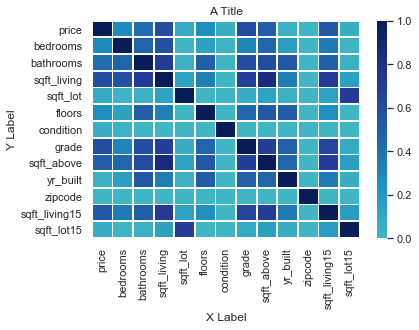

In [43]:
sns.heatmap(
    data.corr(),
    center=0,
    vmin= 0,
    vmax= 1,
    cmap="YlGnBu",
    cbar=True,
    linewidths=.8
);
plt.title('A Title')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.savefig('image_4.png')
plt.show()

First, let's model simple linear regression between our continious predictor and target variable

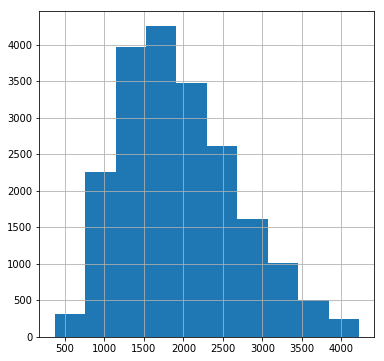

In [24]:
data['sqft_living'].hist(figsize  = [6, 6]);

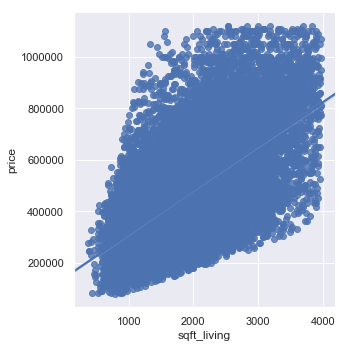

In [47]:
image4 = sns.lmplot(x='sqft_living', y='price', data=data)

In [50]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [51]:
outcome = 'price'
predictors = 'sqft_living'
formula = outcome + '~' + predictors
model_1 = ols(formula=formula, data=data).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                 1.133e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:24:21   Log-Likelihood:            -2.6993e+05
No. Observations:               20120   AIC:                         5.399e+05
Df Residuals:                   20118   BIC:                         5.399e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.399e+05   3313.527     42.208      0.000    1.33e+05    1.46e+05
sqft_living   170.9313      1.606    106.427      0.000     167.783     174.079
==============================================================================
Omnibus:                      951.596   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1090.463
Skew:                           0.560   Prob(JB):                    1.62e-237
Kurtosis:                       3.214   Cond. No.                     5.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
non_normal = ['sqft_living']
data_log = pd.DataFrame([])
data_log['price'] = data['price']
for col in non_normal:
    data_log[col] = data[col].map(lambda x: np.log(x))

In [58]:
data_log.head()

,price,sqft_living
0,221900.0,7.073270
1,538000.0,7.851661
2,180000.0,6.646391
3,604000.0,7.580700
4,510000.0,7.426549


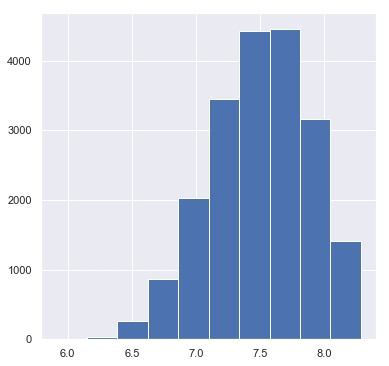

In [59]:
data_log['sqft_living'].hist(figsize  = [6, 6]);

In [60]:
outcome = 'price'
predictors = 'sqft_living'
formula = outcome + '~' + predictors
model_1log = ols(formula=formula, data=data_log).fit()
model_1log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                 1.004e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:27:26   Log-Likelihood:            -2.7034e+05
No. Observations:               20120   AIC:                         5.407e+05
Df Residuals:                   20118   BIC:                         5.407e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.817e+06   2.29e+04    -79.486      0.000   -1.86e+06   -1.77e+06
sqft_living  3.051e+05   3044.257    100.216      0.000    2.99e+05    3.11e+05
==============================================================================
Omnibus:                      857.073   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              971.393
Skew:                           0.538   Prob(JB):                    1.16e-211
Kurtosis:                       3.005   Cond. No.                         150.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Thus, we got worse results using log transformation and not going to use it in final model

***
**'part2b'** multi regression sqft_living + grades

dealing with categorical variables

In [62]:
data_grades = data[['price', 'grade']]
grade_dummies = pd.get_dummies(data_grades['grade'], prefix='gr')
data_grades = pd.concat([data_grades, grade_dummies], axis = 1)
data_grades.drop(columns = 'grade', inplace=True)

In [63]:
data_sqft_liv = data['sqft_living']

In [64]:
data_to_model = pd.concat([data_grades, data_sqft_liv], axis= 1)

In [65]:
outcome = 'price'
predictors = data_to_model.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [66]:
model_multi_1= ols(formula= formula, data=data_to_model).fit()
model_multi_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     1752.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:28:48   Log-Likelihood:            -2.6860e+05
No. Observations:               20120   AIC:                         5.372e+05
Df Residuals:                   20110   BIC:                         5.373e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.736e+05    1.6e+04     17.106      0.000    2.42e+05    3.05e+05
gr_3        -6.133e+04   1.37e+05     -0.448      0.654   -3.29e+05    2.07e+05
gr_4        -1.267e+05   3.05e+04     -4.151      0.000   -1.87e+05   -6.69e+04
gr_5        -1.192e+05   1.79e+04     -6.639      0.000   -1.54e+05    -8.4e+04
gr_6        -8.612e+04   1.59e+04     -5.404      0.000   -1.17e+05   -5.49e+04
gr_7        -3.392e+04   1.57e+04     -2.162      0.031   -6.47e+04   -3171.122
gr_8         4.435e+04   1.58e+04      2.815      0.005    1.35e+04    7.52e+04
gr_9         1.455e+05    1.6e+04      9.070      0.000    1.14e+05    1.77e+05
gr_10        2.214e+05   1.68e+04     13.180      0.000    1.88e+05    2.54e+05
gr_11        2.896e+05   2.24e+04     12.908      0.000    2.46e+05    3.34e+05
sqft_living    95.7177      2.075     46.120      0.000      91.650      99.786
==============================================================================
Omnibus:                     1320.775   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1632.483
Skew:                           0.639   Prob(JB):                         0.00
Kurtosis:                       3.562   Cond. No.                     7.35e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.59e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**'part2b'** multi regression sqft_living + grades + zipcodes

In [69]:
# concat sub dataframe
in_city_zip = zip_codes.loc[zip_codes['City'] == 'SEATTLE']
in_city_zip = in_city_zip['Zipcode'].to_frame()

In [70]:
in_city_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 21546 to 42501
Data columns (total 1 columns):
Zipcode    64 non-null int64
dtypes: int64(1)
memory usage: 1.0 KB


In [71]:
in_city_zip.head()

,Zipcode
21546,98101
21547,98102
21548,98103
21549,98104
21550,98105


In [72]:
data['in_city'] = data['zipcode'].apply(lambda x: 1 if x in list(in_city_zip['Zipcode']) else 0)

In [73]:
print(data['in_city'].count())
print(data['in_city'].unique())
print(data['in_city'].value_counts())

20120
[1 0]
0    11630
1     8490
Name: in_city, dtype: int64


In [74]:
in_city_dummies = pd.get_dummies(data['in_city'], prefix= 'city')

In [75]:
data_to_model_2= pd.concat([data_to_model, in_city_dummies], axis= 1)

In [76]:
data_to_model_2.head()

,price,gr_3,gr_4,gr_5,gr_6,gr_7,gr_8,gr_9,gr_10,gr_11,sqft_living,city_0,city_1
0,221900.0,0,0,0,0,1,0,0,0,0,1180,0,1
1,538000.0,0,0,0,0,1,0,0,0,0,2570,0,1
2,180000.0,0,0,0,1,0,0,0,0,0,770,1,0
3,604000.0,0,0,0,0,1,0,0,0,0,1960,0,1
4,510000.0,0,0,0,0,0,1,0,0,0,1680,1,0


In [83]:
import pickle
with open ('final_data_to_model.pickle', 'wb') as file:
    pickle.dump(data_to_model_2, file, pickle.HIGHEST_PROTOCOL)

In [84]:
#
outcome = 'price'
predictors = data_to_model_2.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [85]:
#
model_multi_2= ols(formula= formula, data=data_to_model_2).fit()
model_multi_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     1952.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:52:06   Log-Likelihood:            -2.6759e+05
No. Observations:               20120   AIC:                         5.352e+05
Df Residuals:                   20109   BIC:                         5.353e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.829e+05   1.05e+04     17.428      0.000    1.62e+05    2.03e+05
gr_3        -2.089e+04    1.3e+05     -0.161      0.872   -2.75e+05    2.33e+05
gr_4        -1.184e+05   2.92e+04     -4.050      0.000   -1.76e+05   -6.11e+04
gr_5        -1.282e+05   1.75e+04     -7.318      0.000   -1.63e+05   -9.39e+04
gr_6        -1.219e+05   1.57e+04     -7.777      0.000   -1.53e+05   -9.12e+04
gr_7        -5.997e+04   1.54e+04     -3.885      0.000   -9.02e+04   -2.97e+04
gr_8         2.109e+04   1.55e+04      1.361      0.173   -9278.044    5.15e+04
gr_9         1.276e+05   1.57e+04      8.104      0.000    9.68e+04    1.58e+05
gr_10        2.072e+05   1.64e+04     12.609      0.000    1.75e+05    2.39e+05
gr_11        2.763e+05   2.16e+04     12.769      0.000    2.34e+05    3.19e+05
sqft_living   112.0436      2.007     55.840      0.000     108.111     115.977
city_0       4.173e+04   5370.516      7.770      0.000    3.12e+04    5.23e+04
city_1       1.412e+05   5345.095     26.410      0.000    1.31e+05    1.52e+05
==============================================================================
Omnibus:                     1426.809   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1963.311
Skew:                           0.616   Prob(JB):                         0.00
Kurtosis:                       3.907   Cond. No.                     1.77e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.74e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

OUR FINAL MODEL:

Y_HAT = INTERCEPT + (GR_3, GR_4, GR_5, GR_6, GR_7, GR_8, GR_9, GR_10, GR_11)*X1 + (CITY_0 + CITY_1)*X2 + SQFT_LIVING*X3

Y_HAT = 182900 + ((0), (-118400), (-128200), (- 121900), (-59970), (0), (127600), (207200), (276300))*X1 +
    + ((41730), (141200))*X2 + 112.04*X3
 where:
 X1 - what grade is given to a house;
 X2 - whether a house is located in city limits or not;
 X3 - footage of the home, sq feet

***
sklearn model
***

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
y = data_to_model_2['price']
linreg = LinearRegression()
linreg.fit(predictors, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [88]:
linreg.intercept_

294663.493425545

In [89]:
linreg.coef_

array([-4.12099867e+04, -1.38679551e+05, -1.48508296e+05, -1.42270177e+05,
       -8.02931721e+04,  7.67794019e+02,  1.07296814e+05,  1.86871177e+05,
        2.56025397e+05,  1.12043612e+02, -4.97161849e+04,  4.97161849e+04])

Let's conduct a model validation:

In [127]:
# use sklearn function
from sklearn.model_selection import train_test_split

y = data_to_model_2[['price']]
X = data_to_model_2.drop(columns='price')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [128]:
# model regression on both train and test splits
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [139]:
# calculate test/train RMSE
from sklearn.metrics import mean_squared_error

train_mse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_mse = np.sqrt(mean_squared_error(y_test, y_hat_test))
print('Train  Root Mean Squared Error,$:', round(train_mse))
print('Test Root Mean Squared Error, $:', round(test_mse))
print('Ratio testMSE/trainMSE, %:', round((test_mse/train_mse*100), 2))

Train  Root Mean Squared Error,$: 144427.0
Test Root Mean Squared Error, $: 144781.0
Ratio testMSE/trainMSE, %: 100.25
